In [12]:
import matplotlib.pyplot as plt
import numpy as np # useful for calculations
import h5py #required to read hdf5 files
import matplotlib as mpl
from tqdm import tqdm
from scipy import spatial
import pdb
import pickle

plt.rcParams.update({
    'figure.figsize': (9, 6),
    'agg.path.chunksize': 2000,
    'xtick.direction': 'in',
    'xtick.major.size': 6,
    'xtick.major.width': 1,
    'ytick.direction': 'in',
    'ytick.major.size': 6,
    'ytick.major.width': 1,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.top': True,
    'ytick.right': True,
})

FloatType = np.float64  # double precision: np.float64, for single use np.float32

def read_gadget_snapshot(file_name):
	data = h5py.File(file_name, 'r')  # load full hdf5 file
	time = FloatType(data['Header'].attrs['Time']) # the scale factor at which snapshot was written
	BoxSize = FloatType(data['Header'].attrs['BoxSize']) # box size in code units (Mpc)
	Pos = np.array(data['PartType1']['Coordinates'], dtype=FloatType) #3d Positions of all particles, e.g. x coord: Pos[:,0]
	mass = FloatType(data['Header'].attrs['MassTable'][1]) # mass of one DM particle
	n_particles = Pos.size // 3
	return time, Pos, mass, n_particles, BoxSize

file_name = "snapshot_002.hdf5"
time, Pos, mass, n_particles, BoxSize = read_gadget_snapshot(file_name)

In [13]:
with open('halos.pkl', 'rb') as file:
    halos = pickle.load(file)
# halos is a list of lists, each list composed of indices ofparticles in the original snapshot data

## 3rd most massive halo
3rd largest halo at z=0 --> since all particles same mass, just find the one with the 3rd greatest number of particles

In [16]:
sizes = np.array([len(h) for h in halos]) # somehow seems it's already sorted

Text(0, 0.5, '$y$ [Mpc]')

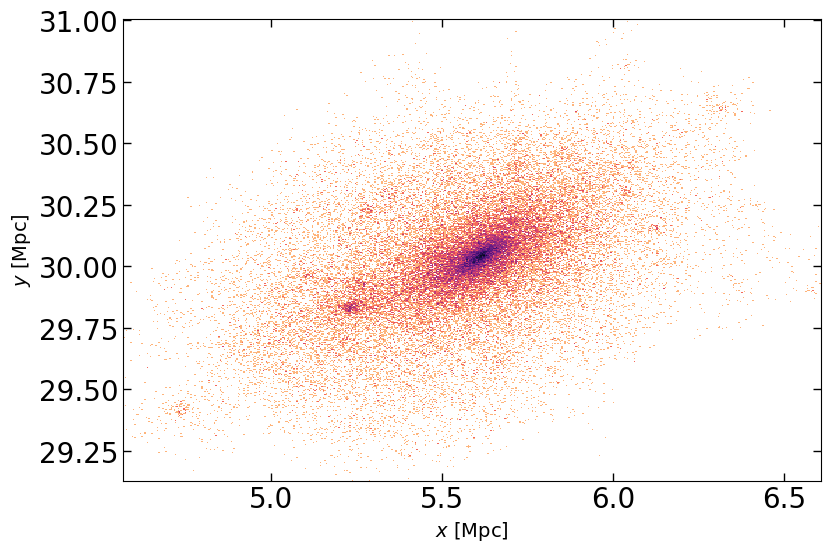

In [17]:
halo3 = halos[2]
n_halo3 = len(halo3)

Pos3 = Pos[halo3]


x3=Pos3[:, 0]
y3=Pos3[:, 1]
z3=Pos3[:, 2]
plt.hist2d(x3, y3, bins = 500,  norm=mpl.colors.LogNorm(vmin=0.5, vmax=40), cmap = 'magma_r') 
plt.xlabel('$x$ [Mpc]')
plt.ylabel('$y$ [Mpc]')
# plt.savefig('3rd_largest_halo_map.png', dpi=200, transparent=True)

Text(0, 0.5, 'Number of Halos')

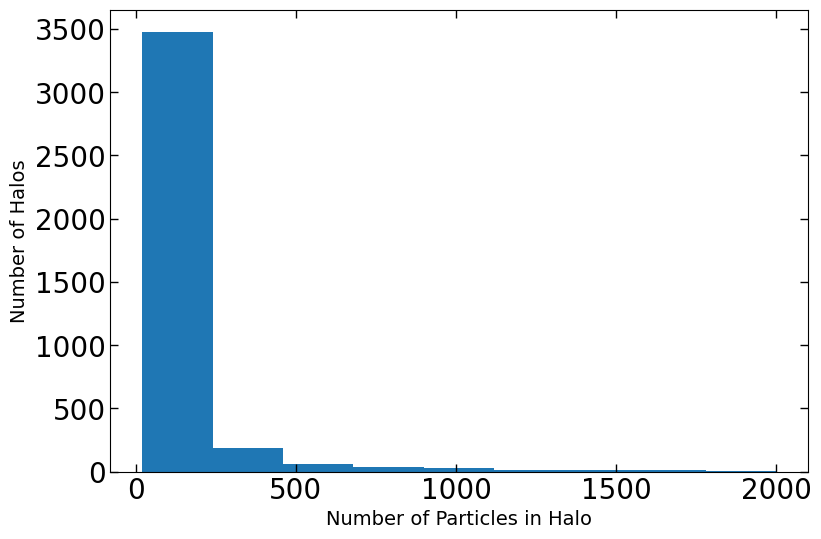

In [18]:
# histogram of halo particle numbers (not masses yet, need to convert)
mask = sizes >= 20 # only plot halos with at least 20 particles
plt.hist(sizes[mask], bins=np.linspace(20, 2000, 10))
plt.xlabel('Number of Particles in Halo')
plt.ylabel('Number of Halos')